In [139]:
import pandas as pd
import numpy as np 
import sqlite3 
import matplotlib.pyplot as plt

#### 1. connect to database

In [140]:
con = sqlite3.connect('../../database/database.db')

In [141]:
df = pd.read_sql_query("""
    SELECT g1.id, g2.id, g2.user_id, g1.timestamp_ms as time_1, g2.timestamp_ms as time_2
    FROM general_tweets as g1, general_tweets as g2
    WHERE g1.id == g2.in_reply_to_status_id AND g2.user_id == '56377143' 
""", con)

#### 2. augemented data with reply time

In [142]:
df['time_1'] = pd.to_datetime(df.time_1)
df['time_2'] = pd.to_datetime(df.time_2)
df.drop(columns=['id'], inplace=True)

In [143]:
df['reply_time'] = df['time_2'] - df['time_1']
df['reply_time_in_seconds'] = [df['reply_time'].iloc[i].seconds for i in range(len(df))]
df['reply_time_in_minutes'] = df['reply_time_in_seconds']/60

In [144]:
df['month'] = [df['time_1'].iloc[i].month for i in range(len(df))]
df['year'] = [df['time_1'].iloc[i].year for i in range(len(df))]

In [145]:
df.drop(columns='user_id', inplace=True)

In [149]:
sth = df[['reply_time_in_minutes', 'month', 'year']].groupby(['year', 'month'], as_index=False).agg(['mean', 'count'])
sth.reset_index(inplace=True)

In [153]:
sth.columns = sth.columns.get_level_values(0)
sth.set_axis(['year', 'month', 'mean', 'count'], axis=1, inplace=True)

In [154]:
a = sth.iloc[:7]
b = sth.iloc[7:]
sth['covid'] = ['before' for _ in range(len(a))] + ['after' for _ in range(len(b))]

In [155]:
import seaborn as sns

Text(0, 0.5, 'reply time (minutes)')

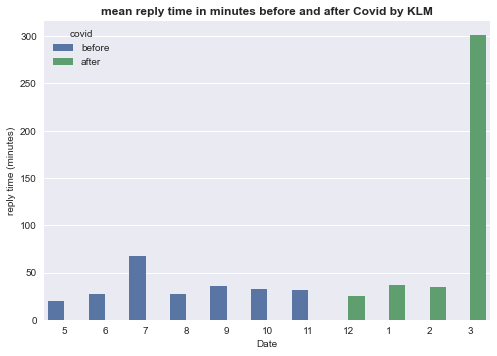

In [137]:
ax = sns.barplot(data=sth, x='month', y='mean', hue='covid', order=sth['month'])
# ax.legend(['before', 'after'])
ax.set_title('mean reply time in minutes before and after Covid by KLM', size=12, weight='bold')
ax.set_xticklabels(sth['month'], rotation='horizontal')
ax.set_xlabel('Date', size=10)
ax.set_ylabel('reply time (minutes)', size=10)

Text(0, 0.5, 'nr of reply')

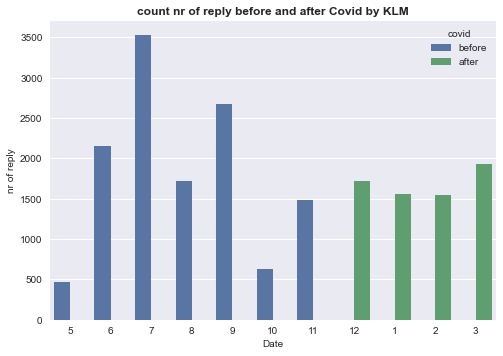

In [156]:
ax = sns.barplot(data=sth, x='month', y='count', hue='covid', order=sth['month'])
# ax.legend(['before', 'after'])
ax.set_title('count nr of reply before and after Covid by KLM', size=12, weight='bold')
ax.set_xticklabels(sth['month'], rotation='horizontal')
ax.set_xlabel('Date', size=10)
ax.set_ylabel('nr of reply', size=10)